# ***Project on the Computer Virus Attacks Dataset Using Machine learning algorithms.***

In [1]:
#importing python packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2, GenericUnivariateSelect
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
import time

import warnings
warnings.filterwarnings('ignore')


In [2]:
# to Display full content of dataframe

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)

## ***Please upload the data602_exam.CSV file into Colab Notebooks folder of your google drive to execute below code.***

In [3]:
#loading the data file from colab notebook folder to a dataframe

from google.colab import drive

drive.mount('/content/drive')  

path1= "drive/MyDrive/Colab Notebooks/data602_exam.csv"         
virus_df = pd.read_csv(path1)                            
print("dataset \n",virus_df.head())

Mounted at /content/drive
dataset 
    Virtual  Offset     loc       Import  Imports     var     Forwarder  UINT  \
0      3.0     3.0   689.0    18.000000      6.0   890.0      6.000000  39.0   
1      3.0     3.0   583.0    15.000000      5.0  1574.0   8640.382774   6.0   
2      3.0     4.0  2796.0    15.000000      5.0   625.0      5.000000  58.0   
3      3.0     3.0   373.0  2726.071722      9.0   615.0      9.000000  16.0   
4      3.0     3.0    77.0    12.000000      4.0    66.0  91945.635853   3.0   

           LONG   BOOL  ...          Img99         Img100         Img101  \
0     17.000000   88.0  ... -208196.847822  149454.443336  330552.774213   
1      7.000000   30.0  ...   36209.864030  221318.549792   -1568.194718   
2     11.000000  152.0  ...   88398.670923   66550.556919    5404.362294   
3  98583.277889   34.0  ... -157101.258148  -60336.395075  157629.928962   
4      0.000000    5.0  ...   32595.648968 -228909.737896  -87033.363460   

          Img102         I

## ***Exploratory Data Analysis***

[2 8 6 4 1 3 9 5 7]


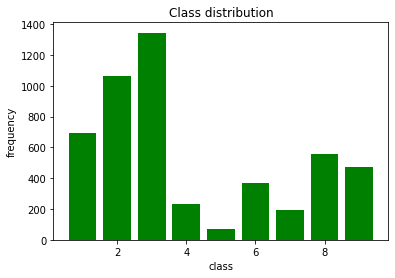

In [4]:
#Exploratory Data Analysis

print(virus_df['target'].unique())                #Multiclass target variable
cls_uniq= virus_df['target'].value_counts().reset_index()   #class distribution
cls_uniq.columns=['class','count']
plt.bar(cls_uniq['class'],cls_uniq['count'],color= 'green')
plt.xlabel('class')
plt.ylabel('frequency')
plt.title('Class distribution')
plt.show()

From above bar graph, class 3 has more rows when compared to other classes and class 5 has very less records in the dataset. Hence the classes are unevenly distributed.

In [5]:
#rowsXcolumns information

virus_df.shape    

(4999, 1805)

dataset has 4999 rows and 1805 columns.

In [6]:
#datatypes & size information

virus_df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Columns: 1805 entries, Virtual to target
dtypes: float64(1804), int64(1)
memory usage: 68.8 MB


1804 columns are of datatype float and 1 column is integer.

In [7]:
#checking for missing values

df_null= virus_df.isnull().sum().reset_index()
df_null.columns= ['col_name', 'null_val']
df_null[df_null['null_val']>0]

,col_name,null_val


There are no missing values in the dataframe.

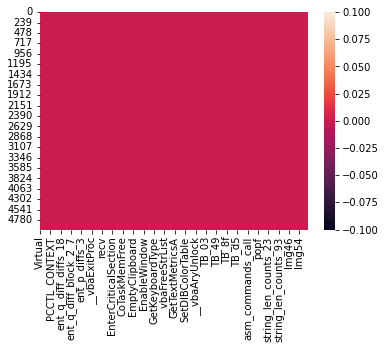

In [8]:
#Data Visualization for null's values

import seaborn as sns
sns.heatmap(virus_df.isnull())       

From the above heatmap it shows that the dataset is clean and has no missing values since it is all red and on the scale red means 0.0.

In [9]:
#Stats & outliers info

virus_df.describe()   #statistics of each column in the dataframe

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,target
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,...,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2413.316145,2659.311487,4424.891220,2291.214822,2512.272757,3470.164710,2612.176503,2472.228927,2554.660865,2452.442360,...,14331.213118,9358.953517,23654.548237,8540.786955,17432.020184,22032.274639,9505.453675,70574.781259,54803.742148,4.086817
std,12506.374487,13159.966494,13604.624599,11996.827931,12656.467627,12442.838259,13026.935701,12695.076990,12533.327183,12280.398873,...,108685.996366,107161.612891,109735.456647,105281.088434,107423.247504,109858.578170,106876.987983,67871.038272,53395.251409,2.677785
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-399471.378431,-344924.897141,-348906.065760,-379757.698729,-345576.170139,-410986.193796,-355679.953652,0.000000,0.000000,1.000000
25%,3.000000,3.000000,77.000000,6.000000,4.000000,37.000000,2.000000,6.000000,0.000000,13.000000,...,-57945.624535,-63567.620933,-50475.672159,-63194.878910,-55114.830841,-50016.264131,-63550.766114,13387.000000,8117.000000,2.000000
50%,3.000000,3.000000,526.000000,12.000000,4.000000,407.000000,4.000000,12.000000,5.000000,20.000000,...,13494.353190,9797.650967,22385.687582,10410.067259,18424.422329,21454.161075,9709.062906,67890.000000,49865.000000,3.000000
75%,4.000000,4.000000,1977.500000,18.000000,7.000000,1330.500000,6.000000,18.000000,9.000000,38.000000,...,87246.586847,82454.969088,95044.827729,80084.458079,87543.264657,96288.509357,82107.827536,88771.000000,68589.500000,6.000000
max,99416.349008,99973.742656,107775.000000,99364.479576,99838.164777,100278.830725,99673.225000,100002.864718,99039.014532,99262.954988,...,500390.536696,358149.487611,465889.867881,364890.436486,389119.972128,443685.869973,437127.690431,412076.355373,300241.000000,9.000000


# ***Splitting the data into X and y variables where X is independent features and y is dependent feature.***

In [10]:
X= virus_df.drop(['target'],axis=1)
y= virus_df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.25, random_state= 42) #using 25% of the data for testing.

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(3749, 1804)
(3749,)
(1250, 1804)
(1250,)


### ***Among different ML classfiers available, Let's see which classfier performs best on the computer virus dataset.***

In [11]:
#Building a simple classification models using all the features

clf1 = LogisticRegression(penalty='l2', C=0.1, solver='lbfgs', random_state=42)     #logistic regression
clf2 = DecisionTreeClassifier(max_depth=50, criterion='entropy', random_state=42)   #Decision Tree classifier
clf3 = KNeighborsClassifier(n_neighbors=6, p=2, metric='manhattan')                 #KNeighbor classifier
clf4 = GaussianNB()                                                                 #Gaussian Naive Bayes classifier 
clf5 = RandomForestClassifier(max_depth=30,random_state=42)                         #Randomn Forest Classifier
clf6 = SVC(gamma='auto')                                                            #SVM classifier

labs = ['Logistic Regression', 'Decision Tree', 'k-Nearest Neighbors','Naive bayes','Random Forest','SVM']

clf = [clf1, clf2, clf3,clf4,clf5,clf6]
clfs = zip(labs, clf)

for labs,clf in clfs:
  t= time.process_time()
  clf.fit(X_train,y_train)
  fit_time = time.process_time() - t
  y_predict= clf.predict(X_test)
  print(f'Model Accuracy is {clf.score(X_test,y_test):.2f} for {labs}   time:{fit_time:.2f} seconds')

  cm = confusion_matrix(y_test, y_predict)
  print("\n",f'Confusion Matrix for {labs}')
  print("\n",cm)

  print("\n",f'Classification Report for {labs}')
  print("\n",classification_report(y_test, y_predict, target_names=['Virus1', 'Virus2', 'Virus3','Virus4','Virus5','Virus6','Virus7','Virus8', 'Virus9']))


Model Accuracy is 0.54 for Logistic Regression   time:14.80 seconds

 Confusion Matrix for Logistic Regression

 [[127  21  23   0   0   0   0   0   0]
 [  6 219  58   0   0   0   0   0   0]
 [  1   6 329   0   0   0   0   0   0]
 [ 40   7   3   0   0   0   0   0   0]
 [  1   2   9   0   0   0   0   0   0]
 [  4  47  39   0   0   0   0   0   0]
 [  0   5  38   0   0   0   0   0   0]
 [ 10  52  80   0   0   0   0   0   0]
 [  2  91  30   0   0   0   0   0   0]]

 Classification Report for Logistic Regression

               precision    recall  f1-score   support

      Virus1       0.66      0.74      0.70       171
      Virus2       0.49      0.77      0.60       283
      Virus3       0.54      0.98      0.70       336
      Virus4       0.00      0.00      0.00        50
      Virus5       0.00      0.00      0.00        12
      Virus6       0.00      0.00      0.00        90
      Virus7       0.00      0.00      0.00        43
      Virus8       0.00      0.00      0.00       14

From the above it is evident from the model's accuracy that the Random Forest Classifier is performing better on the test data when compared to other classification models. However, it prediction is ver poor for class virus5.

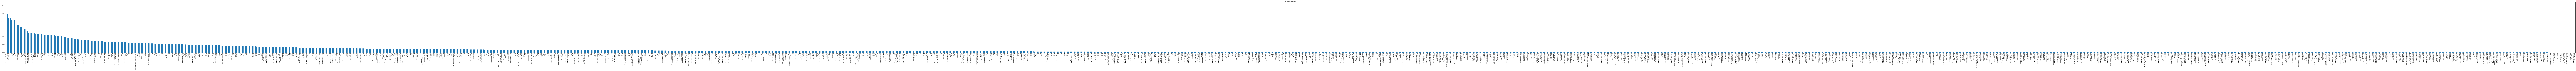

In [12]:
#feature importances using random forest classifier

feature_names= X.columns
feature_importance = clf5.feature_importances_
forest_importances = pd.Series(feature_importance, index=feature_names)
forest_importances.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(500,10))
forest_importances.plot.bar()
plt.title("Feature importances")
plt.ylabel("Mean decrease in impurity")

plt.show()


click on above figure to see the full view, the feature importances are sorted from high importance to low.

### ***Now, lets perform data transformations like Feature Scaling & Feature Extraction.***

Scaling the features makes the flow of gradient descent smooth and helps algorithms quickly reach the minima of the cost function. Without scaling features, the algorithm may be biased toward the feature which has values higher in magnitude.

In [13]:
#Feature Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()            #using scaler to transform the data in the range of 0 to 1 as chi2 can't take negative inputs.
scaler.fit(X)
X1= pd.DataFrame(scaler.transform(X), columns= X.columns, index= X.index)


Having irrelevant data can decrease the model's accuracy, So by doing feature selection, it decreases the training time & model's complexity. Also, It might improve the model's accuracy

Text(0, 0.5, 'CV Accuracy')

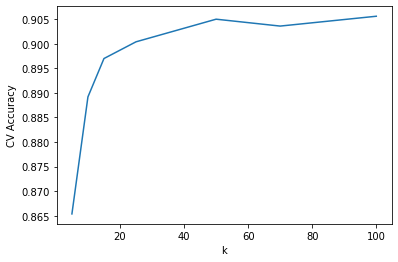

In [14]:
#Feature selection using GenericUnivariateSelect

rf_clf = RandomForestClassifier(max_depth=30,random_state=42)

ks = [i for i in [5, 10, 15, 25,50,70,100]]
ac = []
for k in ks:
  select = GenericUnivariateSelect(score_func=chi2, mode="k_best", param=k)
  X_k = select.fit_transform(X1, y)
  score = cross_val_score(rf_clf, X_k, y, cv=5).mean()
  ac.append( score )

plt.plot(ks, ac)
plt.xlabel('k')
plt.ylabel('CV Accuracy')

### ***With a minor performance loss, the number of features has decreased from 1804 to 25.***

In [15]:
#filtering the dataset with the above selected K features.

print("Feature data dimension: ", X1.shape)

select = GenericUnivariateSelect(score_func=chi2, mode="k_best", param=25)    #using chi2 scoring function as it is a classification model.
z = select.fit_transform(X1, y)
print("After selecting best k features:", z.shape)

filter = select.get_support()          
features = np.array(X1.columns.tolist())         
 
print("Selected best features:")
print(features[filter])  

Feature data dimension:  (4999, 1804)
After selecting best k features: (4999, 25)
Selected best features:
['loc' 'dd' 'db' 'section_names_.data' 'section_names_.rdata'
 'section_names_.text' 'TB_03' 'TB_33' 'TB_cc' 'TB_ff' 'regs_ch'
 'regs_eax' 'asm_commands_dd' 'asm_commands_mov' 'FileSize' 'Offset.1'
 'dd5' 'string_len_counts_2' 'line_count_asm' 'size_asm' 'Plus'
 'ExtendedAscii' 'Img0.1' 'Img106' 'Img107']


### ***Now, let's apply different classification model's on computer virus data which has been scaled & feature selected to perform better prediction accuracy with less training time.***

In [16]:
# Building a model using the best K features

X_filtered = X1.iloc[:,filter]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_filtered, y, test_size=0.3, random_state= 42)


clf1 = LogisticRegression(penalty='l2', C=1, solver='lbfgs', fit_intercept=True, max_iter=500, multi_class='auto',random_state=42)
clf2 = DecisionTreeClassifier(max_depth=50,min_samples_leaf=10, criterion='entropy', random_state=42)
clf3 = KNeighborsClassifier(n_neighbors=6, p=2, metric='manhattan')
clf4 = GaussianNB()
clf5 = RandomForestClassifier(max_depth=30,random_state=42)
clf6 = SVC(gamma='auto')

labs = ['Logistic Regression', 'Decision Tree', 'k-Nearest Neighbors','Naive bayes','Random Forest','SVM']

clf = [clf1, clf2, clf3, clf4, clf5, clf6]
clfs = zip(labs, clf)

for labs,clf in clfs:
  t = time.process_time()
  clf.fit(X_train1,y_train1)
  fit_time = time.process_time() - t
  y_predict1= clf.predict(X_test1)
  print(f'Model accuracy on test data using K best features is {clf.score(X_test1,y_test1):.2f} for {labs}   time: {fit_time:.2f} seconds')

  cm1 = confusion_matrix(y_test1, y_predict1)
  print("\n",f'Confusion Matrix for {labs}')
  print("\n",cm)

  print("\n",f'Classification Report for {labs}')
  print("\n",classification_report(y_test1, y_predict1, target_names=['Virus1', 'Virus2', 'Virus3','Virus4','Virus5','Virus6','Virus7','Virus8', 'Virus9']))


Model accuracy on test data using K best features is 0.68 for Logistic Regression   time: 0.85 seconds

 Confusion Matrix for Logistic Regression

 [[  0   0 171   0   0   0   0   0   0]
 [  0   0 283   0   0   0   0   0   0]
 [  0   0 336   0   0   0   0   0   0]
 [  0   0  50   0   0   0   0   0   0]
 [  0   0  12   0   0   0   0   0   0]
 [  0   0  90   0   0   0   0   0   0]
 [  0   0  43   0   0   0   0   0   0]
 [  0   0 142   0   0   0   0   0   0]
 [  0   0 123   0   0   0   0   0   0]]

 Classification Report for Logistic Regression

               precision    recall  f1-score   support

      Virus1       0.72      0.74      0.73       212
      Virus2       0.78      0.76      0.77       336
      Virus3       0.87      0.98      0.92       401
      Virus4       0.80      0.13      0.23        61
      Virus5       0.00      0.00      0.00        14
      Virus6       0.67      0.27      0.39       107
      Virus7       0.00      0.00      0.00        53
      Virus8     

*From the above, we could see the raise in model's performance for all the models by removing the redundunt data.*

Therefore, It is best to consider **Randomn Forest Classifier** for our dataset. As randomness provides a number of benefits:
*   Randomn forest is an ensemble learning method for classification/ Regression and other tasks that operates by constructing a multitude of decision trees at training time.   
*   The random feature selection of Random Forest are able to perform better when dealing with a large number of features.
*   Due to the averaging over many trees, they provide better probabilities and smoother surfaces compared to decision trees.

### **Let's apply ensemble technique called Bagging and compare it with DT & RF Classifiers.**

**Bagging** is used with decision trees, where it significantly raises the stability of models in improving accuracy and reducing variance, which eliminates the challenge of overfitting.

In [17]:
from sklearn.ensemble import BaggingClassifier

classifiers = [ DecisionTreeClassifier(), 
               BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, max_samples=0.5, oob_score=True) , 
               RandomForestClassifier(n_estimators=100, oob_score=True)]
names = ["DecisionTree", "Bagged Trees", "RandomForest"]

  
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_filtered, y, test_size=.3, random_state=42)

for model, m_name in zip(classifiers, names):
  t = time.process_time()
  model.fit(X_train, y_train)
  fit_time = time.process_time() - t
    
  print("\t", m_name, accuracy_score(y_test, model.predict(X_test)), "\ttime:", fit_time)
  if "oob_score_" in dir(model):
    print("\t\tOOB:", model.oob_score_)

	 DecisionTree 0.8056 	time: 12.71020746299996
	 Bagged Trees 0.9144 	time: 225.04620193800002
		OOB: 0.9002400640170712
	 RandomForest 0.9128 	time: 13.161186369999996
		OOB: 0.9002400640170712


From above, although the accuracy for the bagged tree is almost same as RF, RF has taken very less time for training the model. Also with OOB, RF is performing better. Since RF don't consider  all the data, training a Random Forest is faster than training a Bagging model. Hence Random forest classifier would be the right fit for this computer virus data.

### ***As Randomn Forest is best classifier with less training time, Let's find the hyper parameters of Randomn forest classifier using RandomizedsearchCV.***

In [18]:
#Applying hyperparameter tunning & cross validation using randomized search CV

param = { 
    'n_estimators': [50,100,200,300],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [5,15,30,50],
    'criterion' :['gini', 'entropy']
  }

rf_clf= RandomForestClassifier(random_state=42)
rand_cv = RandomizedSearchCV(estimator= rf_clf, param_distributions= param,cv=5,n_jobs=-1)  

In [19]:
rand_cv.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 15, 30, 50],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [50, 100, 200, 300]})

In [20]:
print("optimum parameters are:\n",rand_cv.best_params_)

optimum parameters are:
 {'n_estimators': 300, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'gini'}


In [21]:
print("training accuracy is",rand_cv.best_score_)

training accuracy is 0.9014015941140405


In [22]:
print('Test set score after CV: ', accuracy_score(y_test1, rand_cv.predict(X_test1)))

Test set score after CV:  0.8993333333333333


As there is no much improvement in the model's accuracy.

### ***Let's apply PCA and distribute the classes equally by oversampling technique.Then perform hyperparameter tunning & Cross validation techniques on top of pca + oversampling.***

**PCA:**
It is a statistics technical and used orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly
uncorrelated variables.

*  PCA also is a tool to reduce multidimensional data to lower dimensions while retaining most of
the information

***Advantages:***
* Removes correlated features.
* Improves model performance by speeding up the training time.
* Reduces overfitting.
* Transforms high dimensional data to low dimensional data so it can be visualized easily.

***Disadvantages:***
* Independent variables become less interpretable.
* Data Standardization is much before PCA.
* Information loss if we don't select the number of principal components correctly.

**Oversampling:** Random resampling provides a naive technique by randomly selecting examples from the minority class, with replacement, and adding them to the training dataset for rebalancing the class distribution for an imbalanced dataset.

Pros:

(1) This method doesn’t lead to information loss.

(2) Performs well and gives good accuracy.

Cons:

(1) Increases Learning Time

(2) Makes Overfitting more likely.

In [23]:
#Applying PCA and oversampling on the dataset

from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler

X= virus_df.drop(['target'],axis=1)       #all features except target 
y= virus_df['target']                     #Target

sc = StandardScaler()               
X= sc.fit_transform(X)              #performing standard scaling on X

pca = PCA(n_components=25)          #choosing 10 components for PCA

pca.fit(X)                          

X_pca= pca.transform(X)             #trandforming X with 1804 features to 10. 

print("before sampling \n",y.value_counts())            #before sampling

ros = RandomOverSampler(random_state=42)                #randomoversampling

X_resampled, y_resampled = ros.fit_resample(X_pca, y)   #Performing oversampling on 10 PCA components of X & y.

print("after sampling \n",y_resampled.value_counts())   #after resampling

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42 )
#X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pca, y, test_size=0.3, random_state=42 )

print("\n",X_pca.shape)
print("\n",X_train2.shape)
print(y_train2.shape)


before sampling 
 3    1344
2    1060
1     696
8     559
9     472
6     371
4     233
7     192
5      72
Name: target, dtype: int64
after sampling 
 2    1344
8    1344
6    1344
4    1344
1    1344
3    1344
9    1344
5    1344
7    1344
Name: target, dtype: int64

 (4999, 25)

 (8467, 25)
(8467,)


**Hyperparameters** are crucial as they control the overall behaviour of a machine learning model. The ultimate goal is to find an optimal combination of hyperparameters that minimizes a predefined loss function to maximize model's  predictive accuracy.

* Random search is a technique where random combinations of the hyperparameters are used to find the best solution for the built model.

**K-Fold Cross-Validation:** Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into.

***Advantages:***

* Cross-validation gives us an idea about how the model will perform on an unknown dataset.
* Cross-validation helps to determine a more accurate estimate of model prediction performance.

***Disadvantages:***

* With cross-validation, we need to train the model on multiple training sets.
* Cross-validation is computationally very expensive as we need to train on multiple training sets.

Using **Randomizedserachcv** we could find the best parameters that fits the data perfectly. And by using cross validation the machine get to train & test on each chunk of data so that the model will not overfit and perform well on unseen data.

In [24]:
#Building a RamdomForest Classifier on above modified dataset (PCA+ Oversampling).

params = { 
    'n_estimators': [50,100,200,300],
    'max_features': [ 'log2','sqrt'],
    'max_depth' : [5,15,30,50],
    'criterion' :['gini', 'entropy']
  }

rf_over_pca= RandomForestClassifier(random_state=42)
rf_over_pca_cv = RandomizedSearchCV(estimator= rf_over_pca, param_distributions= params,cv=5,n_jobs=-1)  #hyperparameter tunning & cross-validation

rf_over_pca_cv.fit(X_train2, y_train2)

print("optimum parameters are:\n",rf_over_pca_cv.best_params_)

print("Training accuracy is",rf_over_pca_cv.best_score_)

print('Test set accuracy is', accuracy_score(y_test2, rf_over_pca_cv.predict(X_test2)))



optimum parameters are:
 {'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': 50, 'criterion': 'entropy'}
Training accuracy is 0.9270108670259022
Test set accuracy is 0.9410305869385506


In [25]:
cm_ = confusion_matrix(y_test2, rf_over_pca_cv.predict(X_test2))
print("\n Confusion Matrix")
print("\n",cm_)

print("\n Classification Report")
print("\n",classification_report(y_test2, rf_over_pca_cv.predict(X_test2), target_names=['Virus1', 'Virus2', 'Virus3','Virus4','Virus5','Virus6','Virus7','Virus8', 'Virus9']))



 Confusion Matrix

 [[355   2   4   4   0   3   1  34   4]
 [ 22 364   7   4   0  12   0   4   7]
 [  1   9 372   0   0   1   0   2   2]
 [  0   0   0 388   0   0   0   0   0]
 [  0   0   0   0 395   0   0   0   0]
 [  5   0   0   0   0 385   0   6   4]
 [  0   5   0   0   0   0 415   0   0]
 [ 28   3   1   3   0   8   1 358   1]
 [ 11   3   1   2   0   3   0   6 383]]

 Classification Report

               precision    recall  f1-score   support

      Virus1       0.84      0.87      0.86       407
      Virus2       0.94      0.87      0.90       420
      Virus3       0.97      0.96      0.96       387
      Virus4       0.97      1.00      0.98       388
      Virus5       1.00      1.00      1.00       395
      Virus6       0.93      0.96      0.95       400
      Virus7       1.00      0.99      0.99       420
      Virus8       0.87      0.89      0.88       403
      Virus9       0.96      0.94      0.95       409

    accuracy                           0.94      3629
   ma

Accuracy is 94% while the precision and recall also hold the same value since, the false positive is almost same as the false negative for most of the classes.

As we know,
Precision = TP / (TP + FP)  Recall = TP / (TP + FN)

Numerators are already same and if FP = FN, then denominators would also be same. Hence Precision is same as recall. 


### **Project Report:**

Below is the step-by-step approach followed to accomplish this project.
* First, load the dataset into a data frame and performed Exploratory data analysis to check any null values and outliers, and also checked the class distribution as this plays the main role in prediction. As evenly distributed data will be much helpful for training a model.
* Separated the input and output variables from the dataset and applied different classification models like Logistic Regression, Decision Tree, KNeighbors, Gaussian Naive bayes, Random forest & Support vector classifiers to see which model performs better for this dataset (un-transformed data). Also calculated the training time taken by each classifier.
* Performed Feature engineering, that is feature scaling and feature selection. For Feature Scaling, I have used a minmax() scaler which will transform all the input features to the scale of 0-1 as chi2 will not support negative values. For Feature Selection, I have used one of the filter methods called "GenericUnivariateSelect" with a scoring function as chi2 (since it is a classification model) and applied it for a range of K values where the optimal value of K=25. With this, I was able to decrease features from 1804 to 25.
* As our data has been transformed. I have applied different classification models again to see the change in model performances along with the training time. Now, the performance has been raised & training time has been decreased for all the models and among them, the Random forest & decision tree classifier is performing better.
* Now, I wanted to see if by applying ensembling technique is there any improvement in the model's performance. So, I have performed Bagging using multiple Decision Trees and compared its performance with the Random forest & decision tree. As a result, Bagging has accuracy almost same as Random forest but the training time is too high for bagging.
* Therefore, I have decided to consider the Random Forest classification model for learning the computer virus dataset and do prediction with the utmost accuracy.
* As the classifier has been decided now I wanted to find the best parameters for the RF classifier that could understand & learn the data better and will perform best on the unseen data. So, I have performed a RandomisedsearchCV to find the optimal parameters with K-fold cross-validation =5.
* However, there is not much difference in accuracy so used PCA to lower the dimensions to 10 and distributed the classes equally using oversampling technique, then I applied randomizedsearchcv to find optimal parameters and to avoid overfitting. Therefore the model performance has been boosted by this process.

**Conclusion:** The simple RF classifier has 92% accuracy. However, All these above steps are performed to achieve better accuracy. Therefore by using an RF classifier with PCA=10 along with oversampling and with the best hyperparameters & K-fold cross-validation =5 were able to achieve an accuracy of 94% That is, by avoiding overfitting, speeding up the training time, simplifying the model explainability, and by performing better on unseen data.